In [1]:
import math
import cv2
import numpy as np
import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget

In [3]:
from mpl_toolkits.mplot3d import Axes3D

## Sample 3d VISUAL POSE

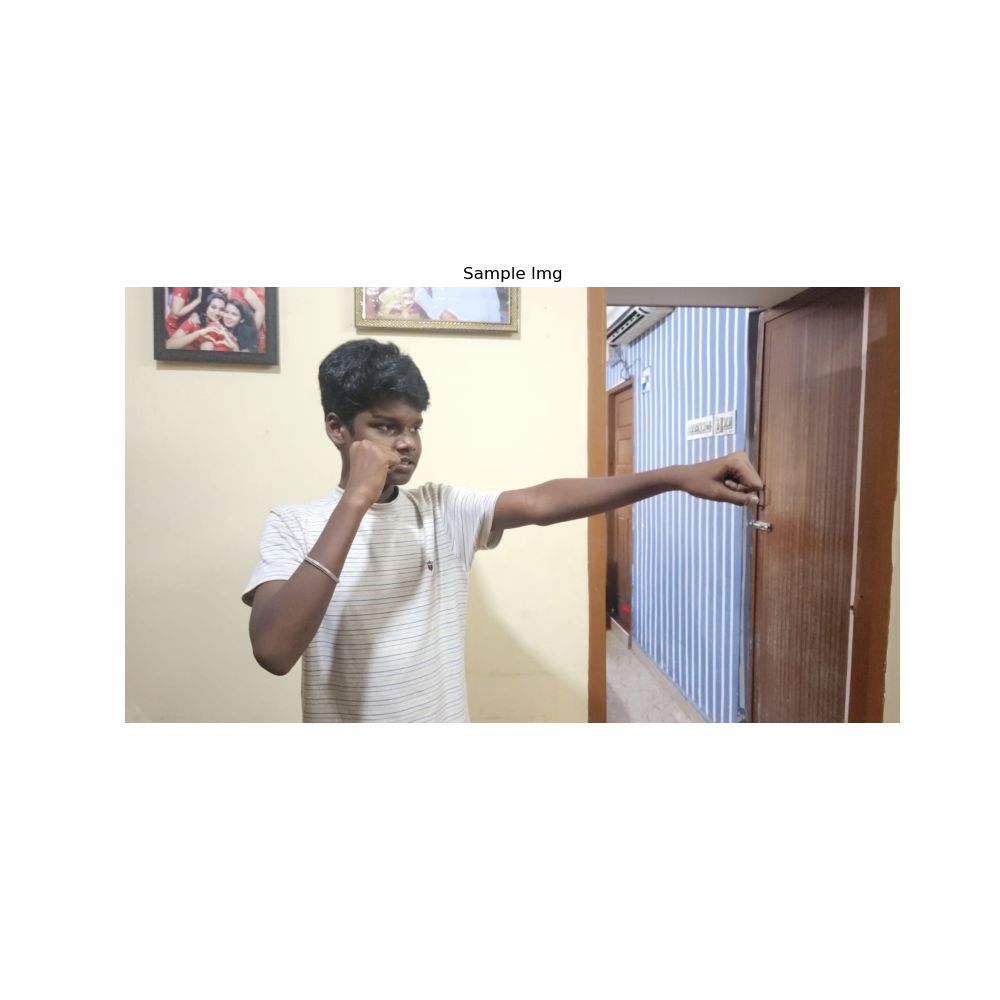

In [4]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils

sample_img = cv2.imread('box.jpeg')

plt.figure(figsize=[10,10])
plt.title("Sample Img")
plt.axis("off"
         )
plt.imshow(sample_img[:,:,::-1])
plt.show()

In [5]:
# Process the image to extract pose landmarks
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks were detected
if results.pose_landmarks:
    # Loop through the first two landmarks as an example
    for i in range(2):
        landmark = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]
        print(f'{mp_pose.PoseLandmark(i).name}:\n {landmark}')

NOSE:
 x: 0.36632362
y: 0.36672619
z: -0.396472335
visibility: 0.996861

LEFT_EYE_INNER:
 x: 0.363678843
y: 0.322657883
z: -0.358132064
visibility: 0.988784075



E:\conda\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [6]:
# Retrieve the height and width of the sample image
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found
if results.pose_landmarks:
    # Iterate two times as we only want to display the first two landmarks
    for i in range(2):
        # Get the specific landmark
        landmark = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]
        
        # Display the found landmarks after converting them into their original scale
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {landmark.x * image_width}')
        print(f'y: {landmark.y * image_height}')
        print(f'z: {landmark.z}')
        print(f'visibility: {landmark.visibility}\n')

NOSE:
x: 586.1177921295166
y: 330.0535708665848
z: -0.39647233486175537
visibility: 0.9968609809875488

LEFT_EYE_INNER:
x: 581.8861484527588
y: 290.39209485054016
z: -0.3581320643424988
visibility: 0.9887840747833252



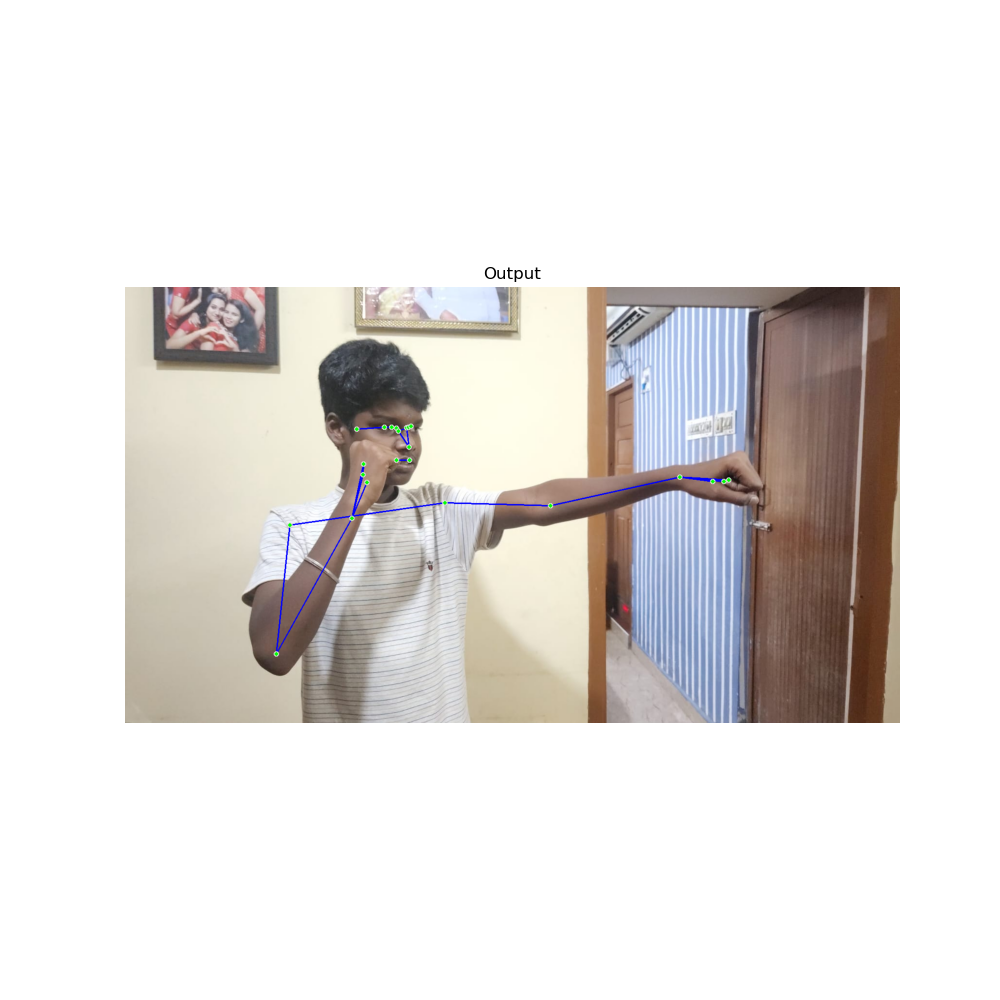

In [7]:
# Create a copy of the sample image to draw landmarks on
img_copy = sample_img.copy()

# Define drawing specs for landmarks and connections with thicker lines and brighter colors
landmark_drawing_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=3, circle_radius=2)  # Green, thick lines
connection_drawing_spec = mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)  # Red, thinner connections

# Check if any landmarks are found
if results.pose_landmarks:
    # Draw pose landmarks on the sample image with specified drawing specs
    mp_drawing.draw_landmarks(image=img_copy, 
                              landmark_list=results.pose_landmarks, 
                              connections=mp_pose.POSE_CONNECTIONS,
                              landmark_drawing_spec=landmark_drawing_spec, 
                              connection_drawing_spec=connection_drawing_spec)

# Specify a size of the figure
fig = plt.figure(figsize=[10, 10])

# Display the output image with the landmarks drawn, convert BGR to RGB for display
plt.title("Output")
plt.axis('off')
plt.imshow(img_copy[:, :, ::-1])  # Convert BGR to RGB
plt.show()


## output pose

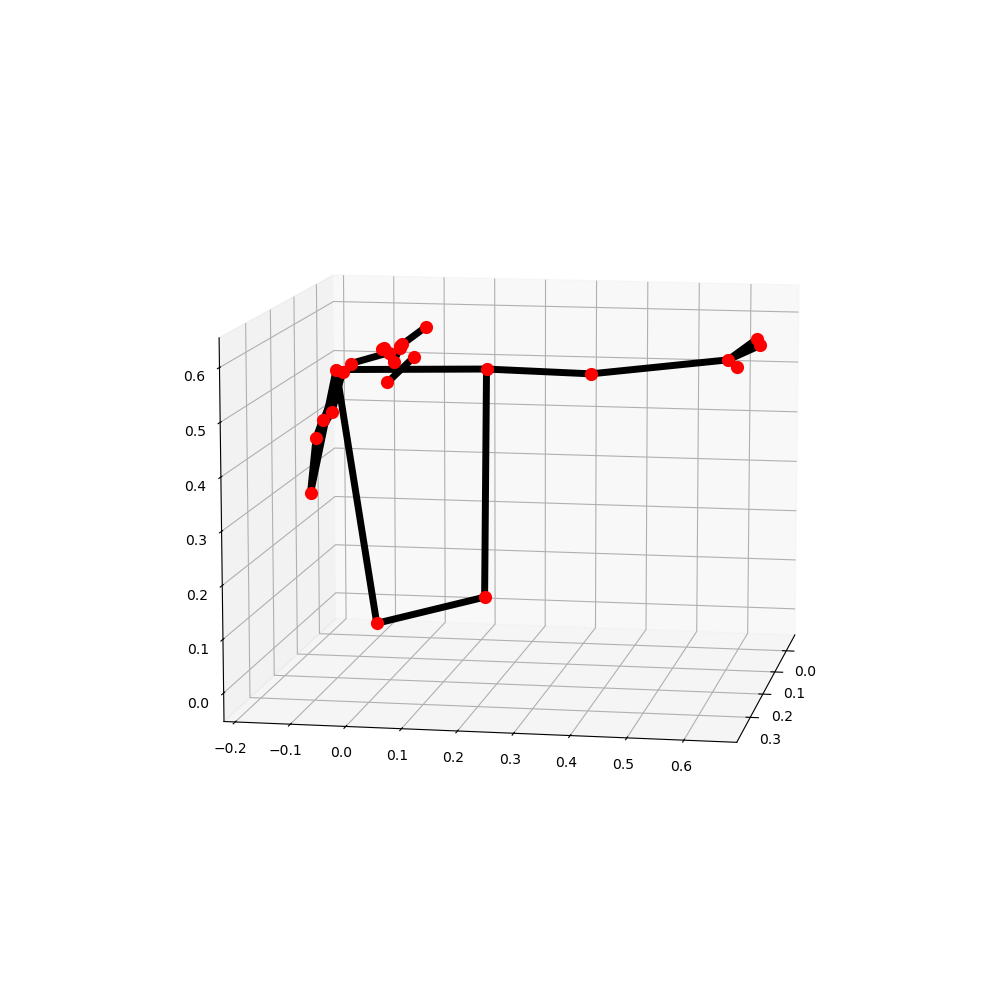

In [8]:
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

## HOLISTIC 3D VISUALIZATION

In [9]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh

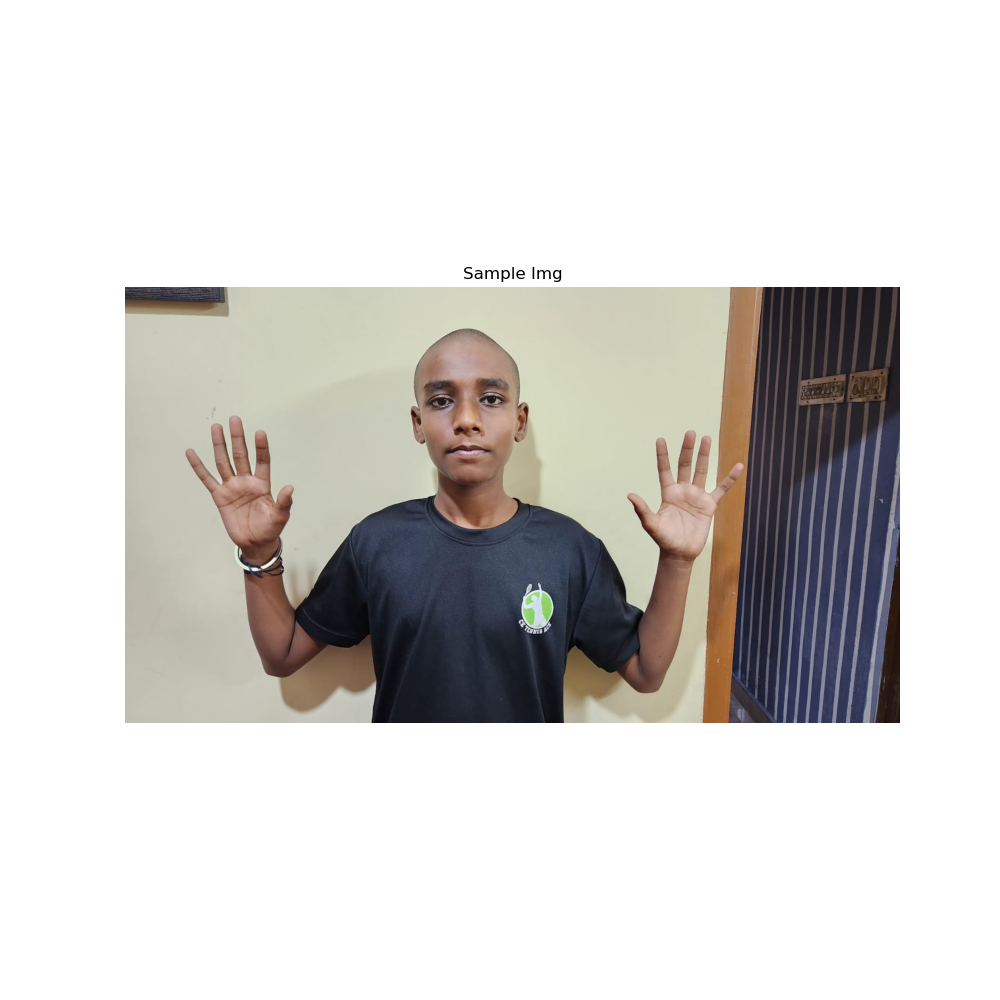

In [10]:
samp_img= cv2.imread('h1.jpeg')
plt.figure(figsize=[10,10])
plt.title("Sample Img")
plt.axis("off")
plt.imshow(samp_img[:,:,::-1])
plt.show()


In [11]:
holistic = mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.3)

# Process the image to extract holistic landmarks (pose, hands, face)
results = holistic.process(cv2.cvtColor(samp_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks were detected
if results.face_landmarks:  # Check for face landmarks
    # Loop through the first two face landmarks as an example
    for i in range(2):
        landmark = results.face_landmarks.landmark[i]
        print(f'Face Landmark {i}:\n {landmark}')

if results.pose_landmarks:  # Check for pose landmarks
    # Loop through specific pose landmarks for left and right shoulders (e.g., index 11 and 12)
    left_shoulder = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER.value]
    right_shoulder = results.pose_landmarks.landmark[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value]

    print(f'Left Shoulder:\n {left_shoulder}')
    print(f'Right Shoulder:\n {right_shoulder}')

Face Landmark 0:
 x: 0.443084717
y: 0.360901833
z: -0.0194766

Face Landmark 1:
 x: 0.441718042
y: 0.32163614
z: -0.032364618

Left Shoulder:
 x: 0.578385413
y: 0.582854688
z: -0.0904466063
visibility: 0.999983311

Right Shoulder:
 x: 0.333105952
y: 0.577597737
z: -0.0680845901
visibility: 0.999980211



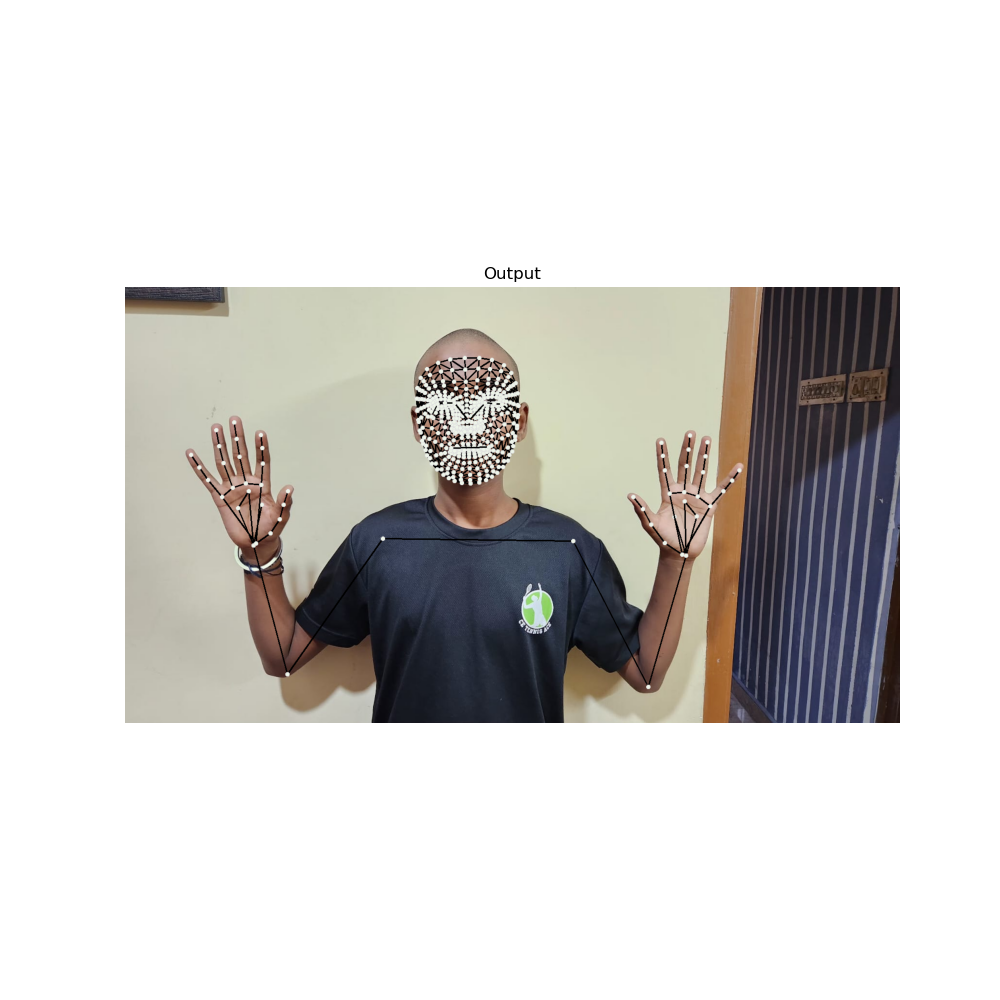

In [12]:
# Create a copy of the sample image to draw landmarks on
imgg_copy = samp_img.copy()

# Define landmark and connection colors
landmark_color = (233, 245, 238)  # Light color for landmarks
connection_color = (0, 0, 0)      # Black for connections

# Draw face landmarks using the face mesh solution
if results.face_landmarks:
    mp_drawing.draw_landmarks(
        image=imgg_copy,
        landmark_list=results.face_landmarks,
        connections=mp_face_mesh.FACEMESH_TESSELATION,  # Face mesh connections
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=landmark_color, thickness=2, circle_radius=2),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=connection_color, thickness=2)
    )

# Draw pose landmarks
if results.pose_landmarks:
    mp_drawing.draw_landmarks(
        image=imgg_copy,
        landmark_list=results.pose_landmarks,
        connections=mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=landmark_color, thickness=2, circle_radius=2),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=connection_color, thickness=2)
    )

# Draw right hand landmarks
if results.right_hand_landmarks:
    mp_drawing.draw_landmarks(
        image=imgg_copy,
        landmark_list=results.right_hand_landmarks,
        connections=mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=landmark_color, thickness=2, circle_radius=2),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=connection_color, thickness=2)
    )

# Draw left hand landmarks
if results.left_hand_landmarks:
    mp_drawing.draw_landmarks(
        image=imgg_copy,
        landmark_list=results.left_hand_landmarks,
        connections=mp_holistic.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=landmark_color, thickness=2, circle_radius=2),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=connection_color, thickness=2)
    )

# Specify a size of the figure
fig = plt.figure(figsize=[10, 10])

# Display the output image with the landmarks drawn, convert BGR to RGB for display
plt.title("Output")
plt.axis('off')
plt.imshow(imgg_copy[:, :, ::-1])  # Convert BGR to RGB
plt.show()

## output

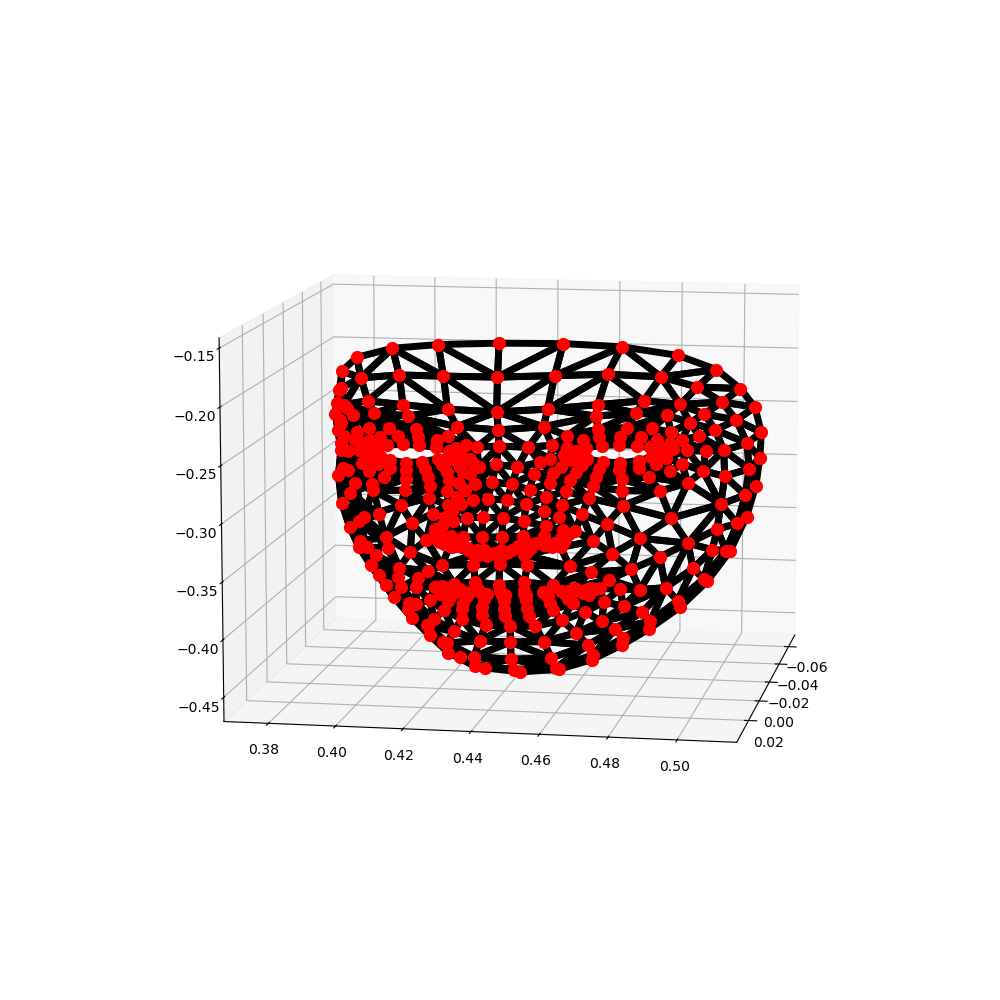

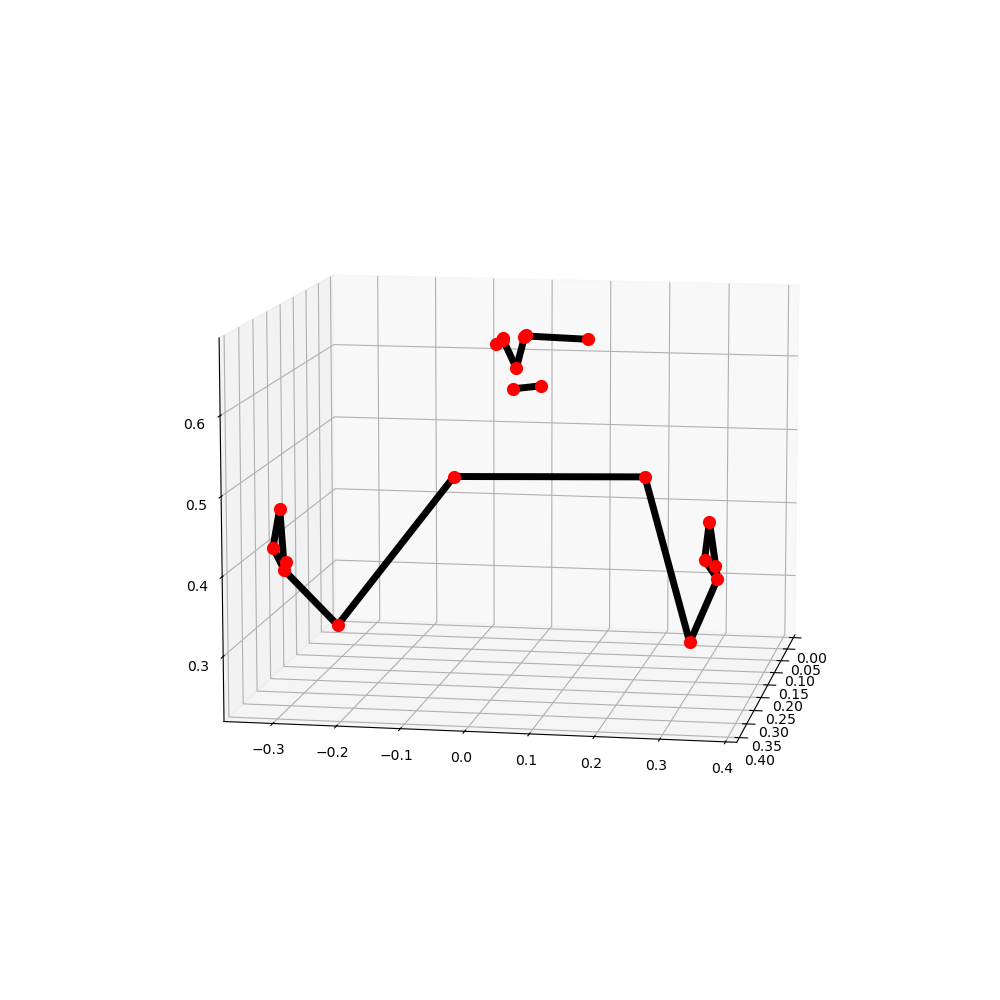

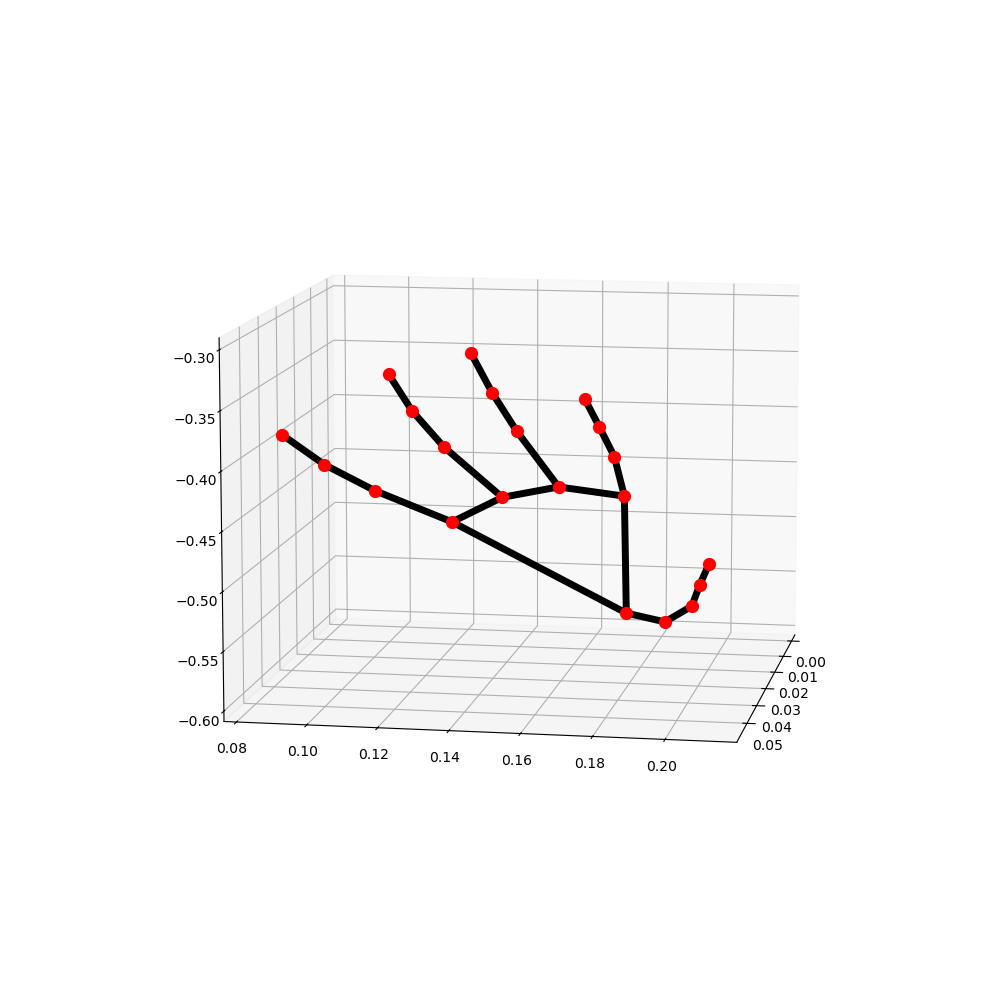

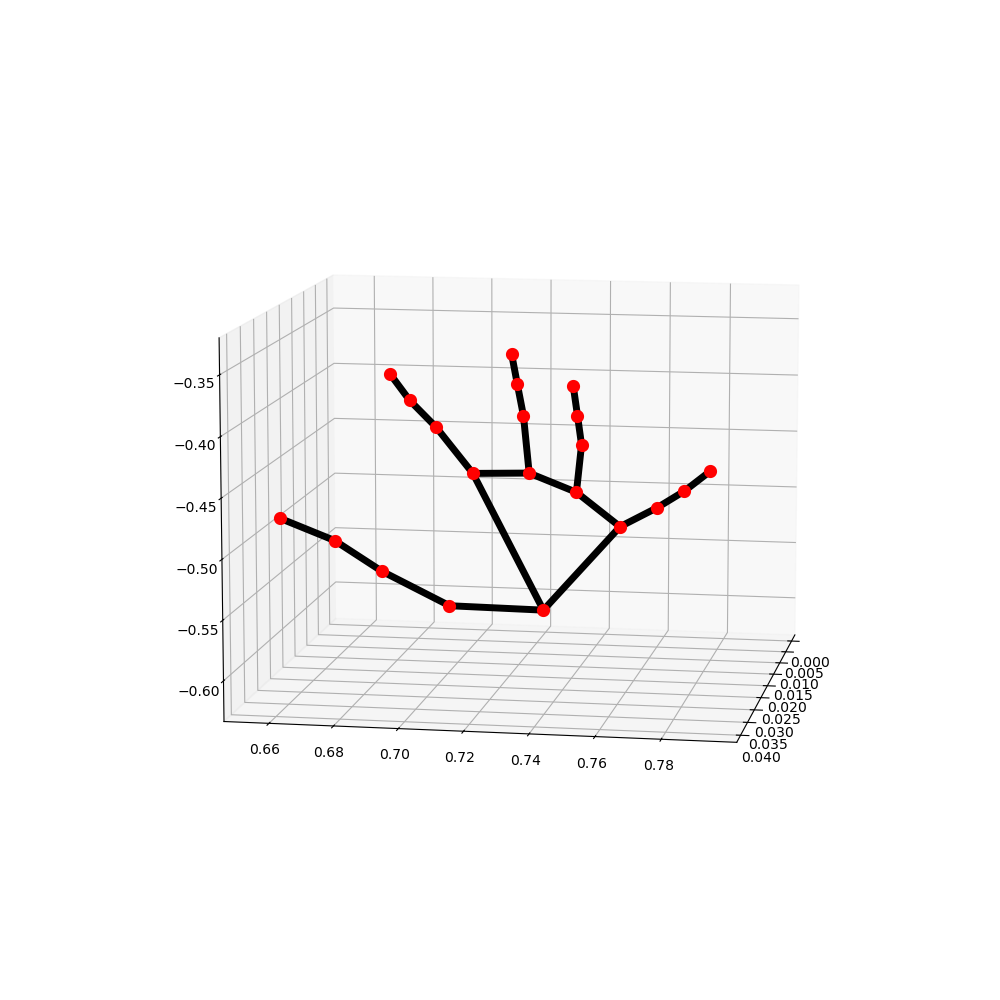

In [13]:
mp_drawing.plot_landmarks(results.face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,)
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)
mp_drawing.plot_landmarks(results.right_hand_landmarks,connections=mp_holistic.HAND_CONNECTIONS,)
mp_drawing.plot_landmarks(results.left_hand_landmarks,connections=mp_holistic.HAND_CONNECTIONS,)

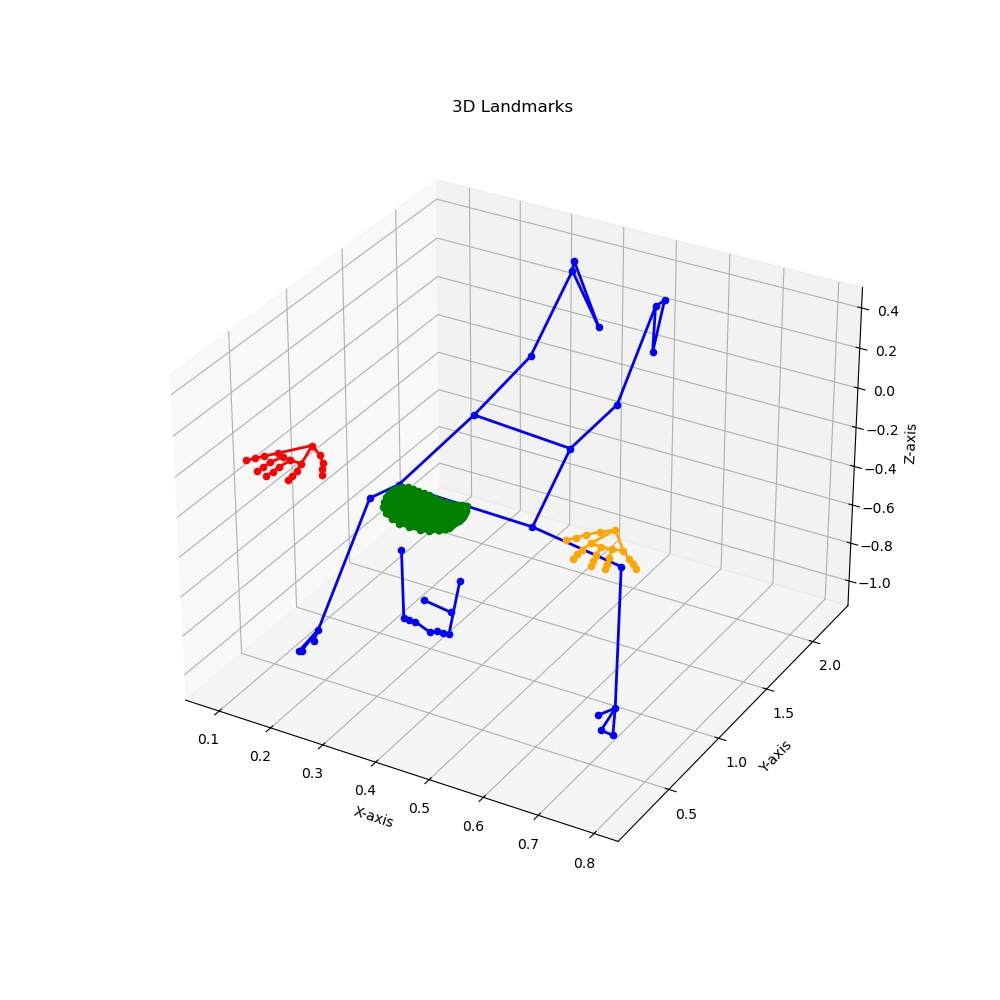

In [14]:


%matplotlib widget

# Initialize MediaPipe Holistic and Face Mesh
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Load sample image
samp_img = cv2.imread('h1.jpeg')

# Process the image to extract holistic landmarks
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5) as holistic:
    results = holistic.process(cv2.cvtColor(samp_img, cv2.COLOR_BGR2RGB))

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Function to plot landmarks
def plot_landmarks(ax, landmarks, connections, color, marker='o'):
    if landmarks:
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            # Get the coordinates of the start and end points
            start = landmarks.landmark[start_idx]
            end = landmarks.landmark[end_idx]
            # Plot the connection
            ax.plot([start.x, end.x], [start.y, end.y], [start.z, end.z], color=color, linewidth=2)
        
        # Plot the individual landmarks
        for landmark in landmarks.landmark:
            ax.scatter(landmark.x, landmark.y, landmark.z, color=color, marker=marker)

# Plot face landmarks
plot_landmarks(ax, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, color='green')

# Plot pose landmarks
plot_landmarks(ax, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, color='blue')

# Plot right hand landmarks
plot_landmarks(ax, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, color='red')

# Plot left hand landmarks
plot_landmarks(ax, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, color='orange')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Landmarks')

plt.show()